In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\togo-dapaong_qc.csv")

In [2]:
df.isna().sum()  # Count missing values in each column

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [3]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [4]:
high_null_cols = df.columns[df.isna().mean() > 0.05]  # List columns with >5% nulls
high_null_cols

Index(['Comments'], dtype='object')

In [5]:
key_vars = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
outliers = df[(df[key_vars].abs() > 3).any(axis=1)]
print(df[key_vars].isna().sum())

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [6]:
outliers = df[(df[key_vars].abs() > 3).any(axis=1)]
print(outliers)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
350     2021-10-25 05:51  2.0  0.0  1.4   3.1   3.1  25.1  92.1  1.7     2.1   
351     2021-10-25 05:52  2.5  0.0  1.7   3.6   3.6  25.2  91.9  1.6     2.4   
352     2021-10-25 05:53  3.0  0.0  1.9   4.1   4.1  25.2  91.7  1.7     2.1   
353     2021-10-25 05:54  3.6  0.0  3.1   4.7   4.7  25.2  91.4  1.5     2.1   
354     2021-10-25 05:55  4.4  0.0  3.9   5.4   5.4  25.2  91.5  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525360  2022-10-24 20:01 -3.3  0.0  0.0   0.0   0.0  26.2  60.2  0.0     0.0   
525361  2022-10-24 20:02 -3.3  0.0  0.0   0.0   0.0  26.1  60.9  0.0     0.0   
525362  2022-10-24 20:03 -3.2  0.0  0.0   0.0   0.0  26.1  61.5  0.0     0.0   
525363  2022-10-24 20:04 -3.2  0.0  0.0   0.0   0.0  26.0  61.9  0.0     0.0   
525364  2022-10-24 20:05 -3.1  0.0  0.0   0.0   0.0  25.9  60.8  0.0     0.0   

        WSstdev     WD  WDstdev   BP  C

In [7]:
print(df[key_vars].describe())  # Check standard stats

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      219.568588       2.368093       3.229490  
std       307.932510       1.462668       1.882565  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.400000       1.900000  
50%         4.300000       2.200000       2.900000  
75%    

In [8]:
print(df[key_vars].max())  # Highest Z-scores
print(df[key_vars].min())  # Lowest Z-scores

GHI       1424.0
DNI       1004.5
DHI        805.7
ModA      1380.0
ModB      1367.0
WS          16.1
WSgust      23.1
dtype: float64
GHI      -12.7
DNI        0.0
DHI        0.0
ModA       0.0
ModB       0.0
WS         0.0
WSgust     0.0
dtype: float64


In [9]:
df.fillna(df.median(numeric_only=True), inplace=True) # Fill NaN values with median for numeric columns only

In [10]:
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)
print("Missing values before:", df.isna().sum())
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)
print("Missing values after:", df.isna().sum())
df.ffill(inplace=True)  # Forward fill

Missing values before: Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Missing values after: Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [11]:
df.to_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\togo-dapaong_qc.csv", index=False)

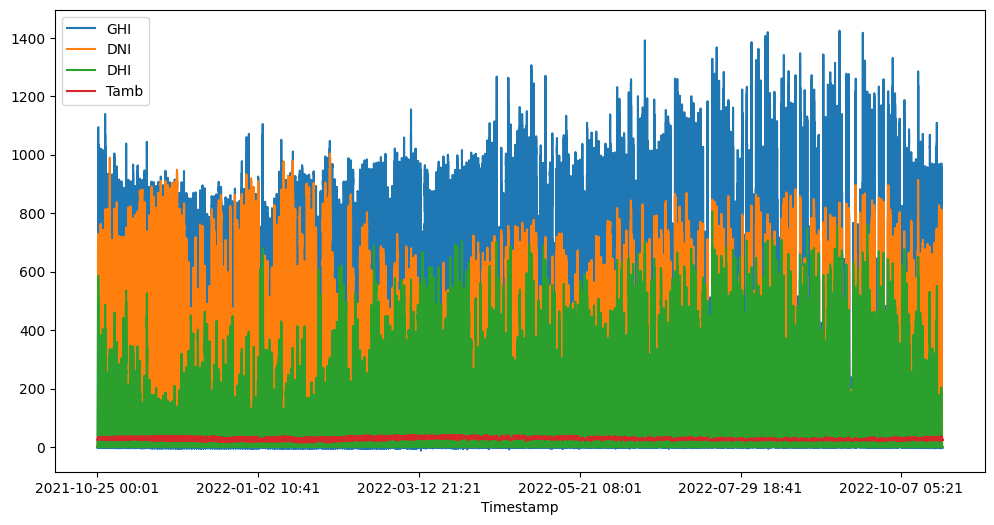

In [12]:
import matplotlib.pyplot as plt
# Line chart for solar irradiance & temperature trends
df.plot(x="Timestamp", y=["GHI", "DNI", "DHI", "Tamb"], kind="line", figsize=(12, 6))
plt.show()

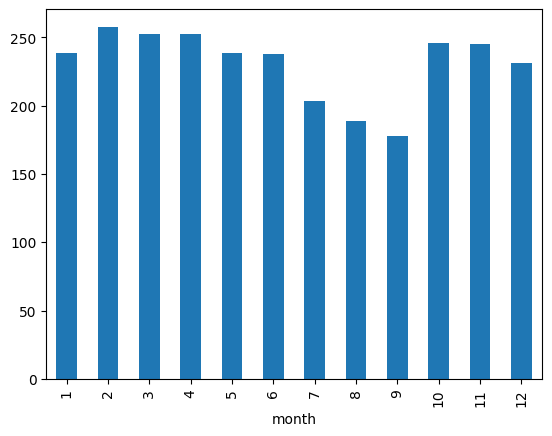

In [13]:
df["month"] = pd.to_datetime(df["Timestamp"]).dt.month
df.groupby("month")["GHI"].mean().plot(kind="bar")
plt.show()

<Axes: xlabel='Cleaning'>

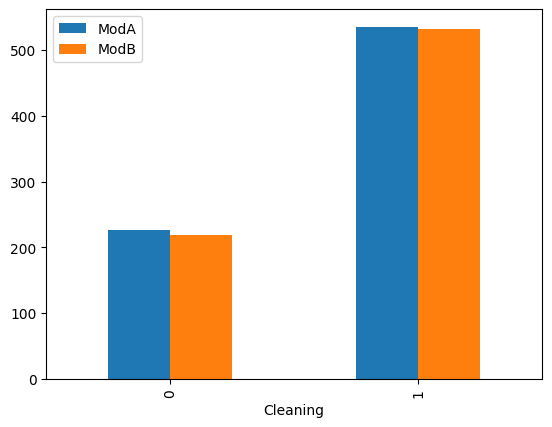

In [14]:
df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind="bar")

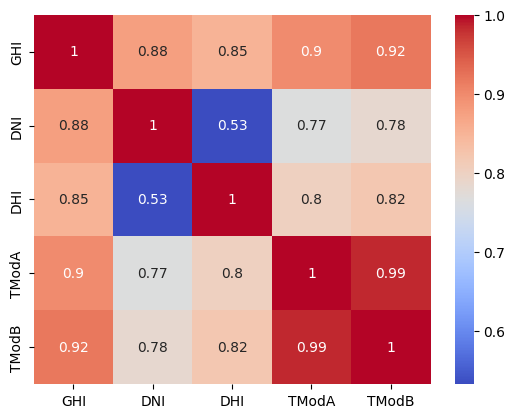

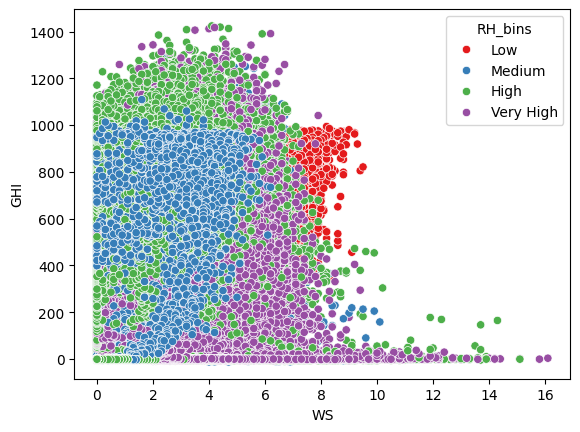

In [15]:
import seaborn as sns
# Heatmap of correlations
sns.heatmap(df[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True, cmap="coolwarm")
plt.show()
# Create discrete bins for RH
df["RH_bins"] = pd.cut(df["RH"], bins=[0, 25, 50, 75, 100], labels=["Low", "Medium", "High", "Very High"])
# Scatter plot with distinct colors
sns.scatterplot(x=df["WS"], y=df["GHI"], hue=df["RH_bins"], palette="Set1")
plt.show()

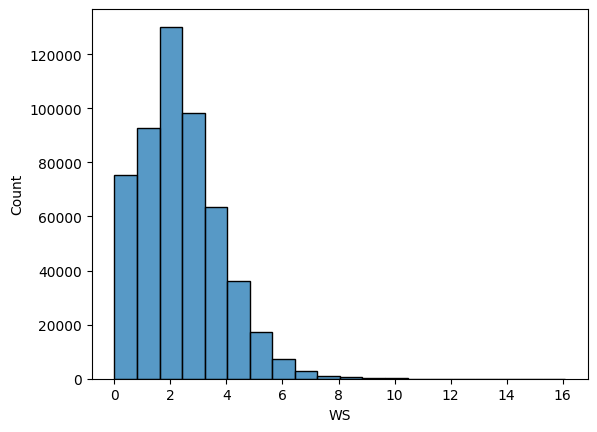

In [16]:
sns.histplot(df["WS"], bins=20)
plt.show()

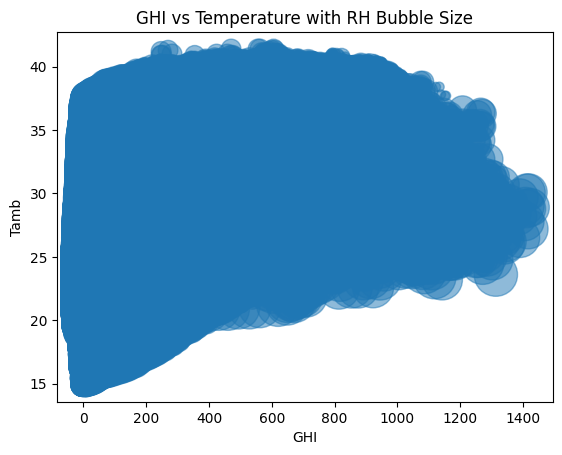

In [17]:
# Bubble chart: GHI vs. Tamb (bubble size = RH)
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"]*10, alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Temperature with RH Bubble Size")
plt.show()